In [ ]:
!pip install fastf1

In [ ]:
import fastf1
import fastf1.plotting
from fastf1.core import Laps
import matplotlib.pyplot as plt
import pandas as pd
from timple.timedelta import strftimedelta
import seaborn as sns

In [ ]:
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)

In [ ]:
# Session to be analyzed
session = fastf1.get_session(2023, 'Singapore', 'Q')
session.load()

In [ ]:
# First, we need to get an array of all drivers.
drivers = pd.unique(session.laps['Driver'])

In [ ]:
# Get drivers fastest lap, sort them by lap time and reindex them
list_fastest_laps = list()

for drv in drivers:
    drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

In [ ]:
# Plot the time differences
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

In [ ]:
# We modify the timedelta to make it easier to plot and then return it to float type
fastest_laps['LapTimeDelta'] = fastest_laps['LapTimeDelta'].astype(str).str[14:18]   # Danger!
fastest_laps['LapTimeDelta'] = fastest_laps['LapTimeDelta'].astype(float)

In [ ]:
# List of team colors per lap to color our plot.
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)

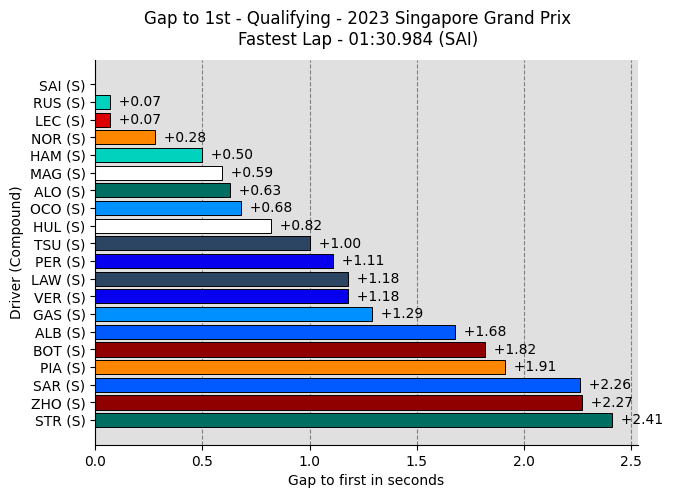

In [ ]:
# Plot all the data
fig, ax = plt.subplots(figsize=(7, 5))
ax.set_facecolor('#E0E0E0')

ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'], color=team_colors, linewidth=0.7, edgecolor='black')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels([f"{driver} ({compound[0]})" for driver, compound in zip(fastest_laps['Driver'], fastest_laps['Compound'])])
ax.set_xlabel("Gap to first in seconds")
ax.set_ylabel("Driver (Compound)")

# Value of each column (Gap to 1st)
for index, value in enumerate(fastest_laps['LapTimeDelta']):
    if index == 0:
        continue
    ax.text(value, index, f"  +{value:.2f}    ", va='center', fontsize=10, color='black')

# Show fastest at the top
ax.invert_yaxis()

# Draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='dashed', color='grey')

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"Gap to 1st - {session.name} - {session.event.year} {session.event.EventName}\n"
             f"Fastest Lap - {lap_time_string} ({pole_lap['Driver']})")

sns.despine(right=True, top=True)

plt.show()